Found 21 files to process...
  (1/21) Loading: channel_adc_count_data_EventBuilder1_art2_run18487_15_strmOffBeamZeroBias_20250519T135242_TPCdecode_ADCDump.npz
  (2/21) Loading: channel_adc_count_data_EventBuilder2_p2_art1_run18487_12_strmOffBeamZeroBias_20250519T132558_TPCdecode_ADCDump.npz
  (3/21) Loading: channel_adc_count_data_EventBuilder3_p2_art2_run18487_6_strmOffBeamZeroBias_20250519T124257_TPCdecode_ADCDump.npz
  (4/21) Loading: channel_adc_count_data_EventBuilder5_art2_run18487_13_strmOffBeamZeroBias_20250519T133220_TPCdecode_ADCDump.npz
  (5/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (6/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_3_strmOffBeamZeroBias_20250519T122111_TPCdecode_ADCDump.npz
  (7/21) Loading: channel_adc_count_data_EventBuilder6_art2_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (8/21) Loading: channel_adc_count_data_EventBuilder6_art2

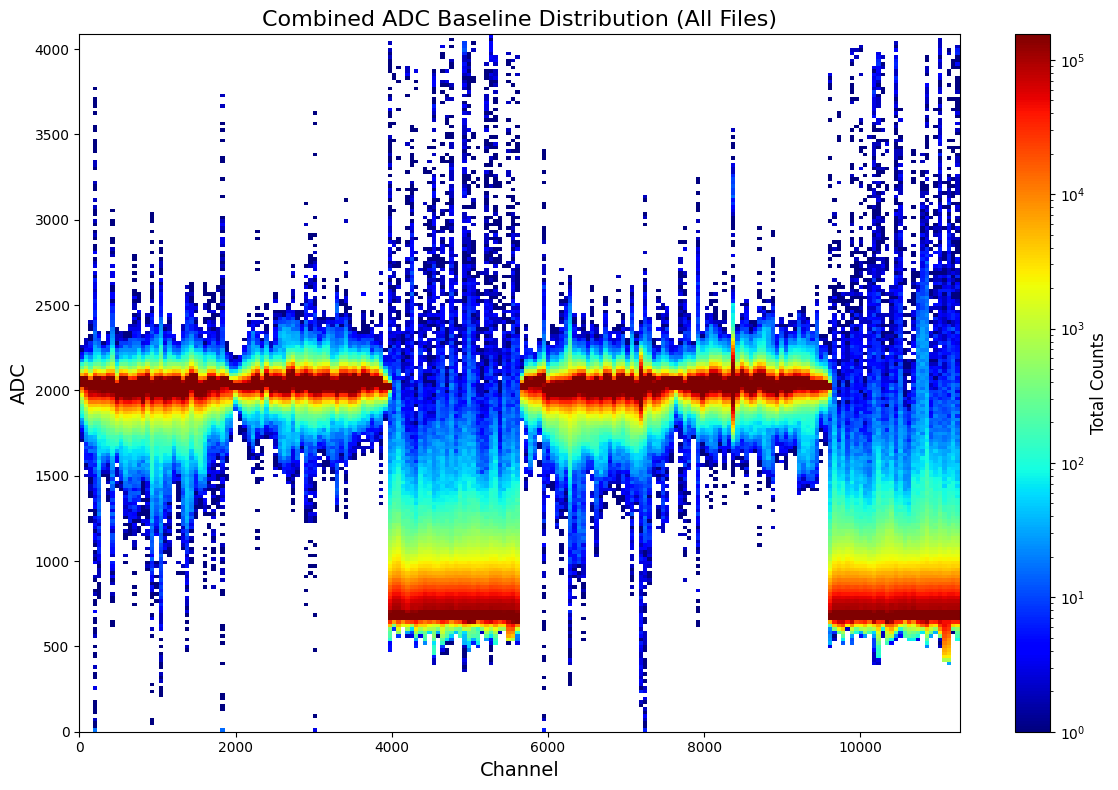

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
import os

# --- User Configuration ---
# Set the path to the directory containing your .npz files
# IMPORTANT: Change this path to match the location of your data.
DATA_DIRECTORY = "/nevis/riverside/data/sc5303/sbnd/continuous_readout"

def plot_combined_adc_distribution(directory_path):
    """
    Loads and combines ADC data from all .npz files in a given directory
    and plots the combined 2D ADC vs. Channel distribution.

    Args:
        directory_path (str): The path to the directory with .npz files.
    """
    # --- File Discovery ---
    # Create a pattern to find all files ending with .npz in the directory
    search_pattern = os.path.join(directory_path, '*.npz')
    file_list = glob.glob(search_pattern)

    # Check if any files were found
    if not file_list:
        print(f"Error: No .npz files found in '{directory_path}'.")
        print("Please check that the DATA_DIRECTORY is correct and contains data.")
        return

    print(f"Found {len(file_list)} files to process...")

    # --- Data Aggregation ---
    # Initialize empty lists to store the data from all files
    all_channels = []
    all_adcs = []
    all_counts = []

    # Loop through each found file and load its data
    for i, file_path in enumerate(file_list):
        try:
            # Show progress
            print(f"  ({i+1}/{len(file_list)}) Loading: {os.path.basename(file_path)}")
            with np.load(file_path) as data:
                all_channels.append(data["channel"])
                all_adcs.append(data["adc"])
                all_counts.append(data["count"])
        except Exception as e:
            print(f"    Warning: Could not load or process file {file_path}. Error: {e}")

    # Check if any data was successfully loaded
    if not all_channels:
        print("Error: No data was successfully loaded from the files. Aborting.")
        return

    # Concatenate the lists of arrays into single large numpy arrays
    print("Combining data from all files...")
    combined_channels = np.concatenate(all_channels)
    combined_adcs = np.concatenate(all_adcs)
    combined_counts = np.concatenate(all_counts)
    print("Data combination complete.")

    # --- Plotting ---
    # Create figure
    plt.figure(figsize=(12, 8))

    # Create 2D histogram using the combined data
    # The norm and cmap are the same as your original script for consistency
    plt.hist2d(
        combined_channels, 
        combined_adcs, 
        bins=[200, 200], 
        weights=combined_counts, 
        norm=colors.LogNorm(vmax=np.max(combined_counts)), 
        cmap="jet"
    )

    # --- Labeling and Styling ---
    plt.xlabel("Channel", fontsize=14)
    plt.ylabel("ADC", fontsize=14)
    plt.title("Combined ADC Baseline Distribution (All Files)", fontsize=16)

    # Colorbar with log scale
    cbar = plt.colorbar()
    cbar.set_label("Total Counts", fontsize=12)
    cbar.ax.tick_params(labelsize=10)

    # Final touches
    plt.grid(False)
    plt.tight_layout()
    # To save the figure, uncomment the following line:
    # plt.savefig("combined_channel_vs_adc.png", dpi=300)
    plt.show()


# --- Main execution ---
if __name__ == "__main__":
    plot_combined_adc_distribution(DATA_DIRECTORY)


Found 21 files to process...
  (1/21) Loading: channel_adc_count_data_EventBuilder1_art2_run18487_15_strmOffBeamZeroBias_20250519T135242_TPCdecode_ADCDump.npz
  (2/21) Loading: channel_adc_count_data_EventBuilder2_p2_art1_run18487_12_strmOffBeamZeroBias_20250519T132558_TPCdecode_ADCDump.npz
  (3/21) Loading: channel_adc_count_data_EventBuilder3_p2_art2_run18487_6_strmOffBeamZeroBias_20250519T124257_TPCdecode_ADCDump.npz
  (4/21) Loading: channel_adc_count_data_EventBuilder5_art2_run18487_13_strmOffBeamZeroBias_20250519T133220_TPCdecode_ADCDump.npz


  (5/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (6/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_3_strmOffBeamZeroBias_20250519T122111_TPCdecode_ADCDump.npz
  (7/21) Loading: channel_adc_count_data_EventBuilder6_art2_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (8/21) Loading: channel_adc_count_data_EventBuilder6_art2_run18487_3_strmOffBeamZeroBias_20250519T122114_TPCdecode_ADCDump.npz
  (9/21) Loading: channel_adc_count_data_EventBuilder6_p2_art1_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (10/21) Loading: channel_adc_count_data_EventBuilder6_p2_art2_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (11/21) Loading: channel_adc_count_data_EventBuilder6_p2_art2_run18487_3_strmOffBeamZeroBias_20250519T122105_TPCdecode_ADCDump.npz
  (12/21) Loading: channel_adc_count_data_EventBuilder7_art1_run18487_1_strmOffBeamZer

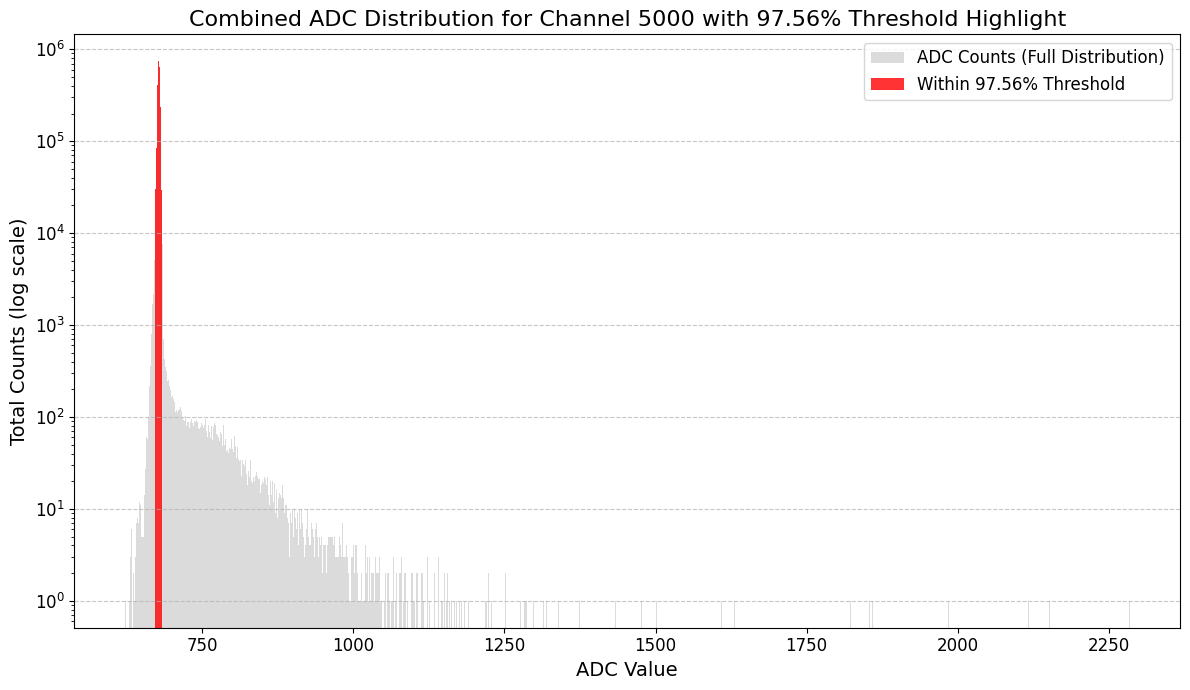

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from collections import defaultdict

# --- User Configuration ---
# Set the path to the directory containing your .npz files
DATA_DIRECTORY = "/nevis/riverside/data/sc5303/sbnd/continuous_readout"
# Manually set the channel you want to inspect here
SELECTED_CHANNEL = 5000

# Define the target percentage for the first integrated region (for highlighting)
THRESHOLD_PERCENTAGE_1 = 97.5609756098

def plot_single_channel_from_all_files(directory_path, channel_to_plot, threshold_percentage_1):
    """
    Loads and combines ADC data from all .npz files in a directory,
    filters it for a specific channel, plots the ADC distribution,
    and highlights the region within Threshold 1 in red.

    Args:
        directory_path (str): The path to the directory with .npz files.
        channel_to_plot (int): The channel number to plot.
        threshold_percentage_1 (float): The percentage for the first threshold.
    """
    # --- File Discovery ---
    search_pattern = os.path.join(directory_path, '*.npz')
    file_list = glob.glob(search_pattern)

    if not file_list:
        print(f"Error: No .npz files found in '{directory_path}'.")
        print("Please check the DATA_DIRECTORY path.")
        return

    print(f"Found {len(file_list)} files to process...")

    # --- Data Aggregation from all files ---
    all_channels, all_adcs, all_counts = [], [], []
    for i, file_path in enumerate(file_list):
        try:
            print(f"  ({i+1}/{len(file_list)}) Loading: {os.path.basename(file_path)}")
            with np.load(file_path) as data:
                all_channels.append(data["channel"])
                all_adcs.append(data["adc"])
                all_counts.append(data["count"])
        except Exception as e:
            print(f"    Warning: Could not load or process file {file_path}. Error: {e}")

    if not all_channels:
        print("Error: No data was successfully loaded. Aborting.")
        return

    print("Combining data from all files...")
    combined_channels = np.concatenate(all_channels)
    combined_adcs = np.concatenate(all_adcs)
    combined_counts = np.concatenate(all_counts)
    print("Data combination complete.")

    # --- Data Filtering for the selected channel ---
    mask = combined_channels == channel_to_plot
    channel_specific_adcs_raw = combined_adcs[mask]
    channel_specific_counts_raw = combined_counts[mask]

    if len(channel_specific_adcs_raw) == 0:
        print(f"No data found for channel {channel_to_plot} in any of the files.")
        if combined_channels.size > 0:
            print(f"Available channels range from {np.min(combined_channels)} to {np.max(combined_channels)}.")
        return

    # --- Sum counts for each unique ADC value for the selected channel ---
    # This creates a dictionary where keys are ADC values and values are their total counts.
    adc_total_counts = defaultdict(int)
    for adc, count in zip(channel_specific_adcs_raw, channel_specific_counts_raw):
        adc_total_counts[adc] += count

    # Sort the ADC values to ensure the bar plot is ordered correctly
    sorted_adcs = sorted(adc_total_counts.keys())
    final_counts = np.array([adc_total_counts[adc] for adc in sorted_adcs]) # Convert to numpy array

    # --- Calculate Most Probable ADC (Baseline) for the selected channel ---
    # The most probable ADC is the one with the highest total count.
    most_probable_adc = sorted_adcs[np.argmax(final_counts)]

    # --- Calculate Threshold 1 Delta for the selected channel ---
    total_counts_channel = np.sum(final_counts)

    # Initialize variables for threshold search
    current_integrated_counts = adc_total_counts.get(most_probable_adc, 0) # Start with baseline count
    threshold_1_delta = np.nan # Initialize to NaN, in case it's not found

    # Determine the maximum possible delta to search for, ensuring it covers all available ADC range.
    if sorted_adcs:
        max_delta = max(max(sorted_adcs) - most_probable_adc, most_probable_adc - min(sorted_adcs)) + 1
    else:
        max_delta = 1 # Fallback if no ADC values are present

    found_threshold_1 = False
    for delta in range(1, max_delta): # delta represents the distance from the baseline
        # Add counts from ADC values above the baseline
        current_integrated_counts += adc_total_counts.get(most_probable_adc + delta, 0)
        # Add counts from ADC values below the baseline
        current_integrated_counts += adc_total_counts.get(most_probable_adc - delta, 0)
        
        # Calculate the current percentage of total counts integrated
        if total_counts_channel > 0:
            current_percentage = (current_integrated_counts / total_counts_channel) * 100
        else:
            current_percentage = 0 # Avoid division by zero

        # Check if threshold 1 has been met
        if not found_threshold_1 and current_percentage >= threshold_percentage_1:
            threshold_1_delta = delta
            found_threshold_1 = True
            break # Threshold found, no need to continue expanding for this specific threshold

    # --- Plotting ---
    plt.figure(figsize=(12, 7))

    # Plot all bars in a default color (e.g., gray)
    plt.bar(sorted_adcs, final_counts, width=1.0, alpha=0.8, color='lightgray', label='ADC Counts (Full Distribution)')

    # Filter and plot the bars within the threshold 1 region in red
    threshold_adcs = []
    threshold_counts = []

    if not np.isnan(threshold_1_delta): # Only proceed if threshold_1_delta was found
        # Define the range for the red highlight
        lower_bound = most_probable_adc - threshold_1_delta
        upper_bound = most_probable_adc + threshold_1_delta

        for adc, count in zip(sorted_adcs, final_counts):
            if lower_bound <= adc <= upper_bound:
                threshold_adcs.append(adc)
                threshold_counts.append(count)

        if threshold_adcs: # Only plot if there are bars within the threshold region
            plt.bar(threshold_adcs, threshold_counts, width=1.0, alpha=0.8, color='red',
                    label=f'Within {threshold_percentage_1:.2f}% Threshold')

    # --- Labeling and Styling ---
    plt.xlabel("ADC Value", fontsize=14)
    plt.ylabel("Total Counts (log scale)", fontsize=14)
    plt.title(f"Combined ADC Distribution for Channel {channel_to_plot} with {threshold_percentage_1:.2f}% Threshold Highlight", fontsize=16)
    plt.yscale('log') # Use log scale for y-axis to better visualize counts
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# --- Main execution ---
if __name__ == "__main__":
    plot_single_channel_from_all_files(DATA_DIRECTORY, SELECTED_CHANNEL, THRESHOLD_PERCENTAGE_1)



Found 21 files to process...
  (1/21) Loading: channel_adc_count_data_EventBuilder1_art2_run18487_15_strmOffBeamZeroBias_20250519T135242_TPCdecode_ADCDump.npz
  (2/21) Loading: channel_adc_count_data_EventBuilder2_p2_art1_run18487_12_strmOffBeamZeroBias_20250519T132558_TPCdecode_ADCDump.npz
  (3/21) Loading: channel_adc_count_data_EventBuilder3_p2_art2_run18487_6_strmOffBeamZeroBias_20250519T124257_TPCdecode_ADCDump.npz
  (4/21) Loading: channel_adc_count_data_EventBuilder5_art2_run18487_13_strmOffBeamZeroBias_20250519T133220_TPCdecode_ADCDump.npz
  (5/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (6/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_3_strmOffBeamZeroBias_20250519T122111_TPCdecode_ADCDump.npz
  (7/21) Loading: channel_adc_count_data_EventBuilder6_art2_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (8/21) Loading: channel_adc_count_data_EventBuilder6_art2

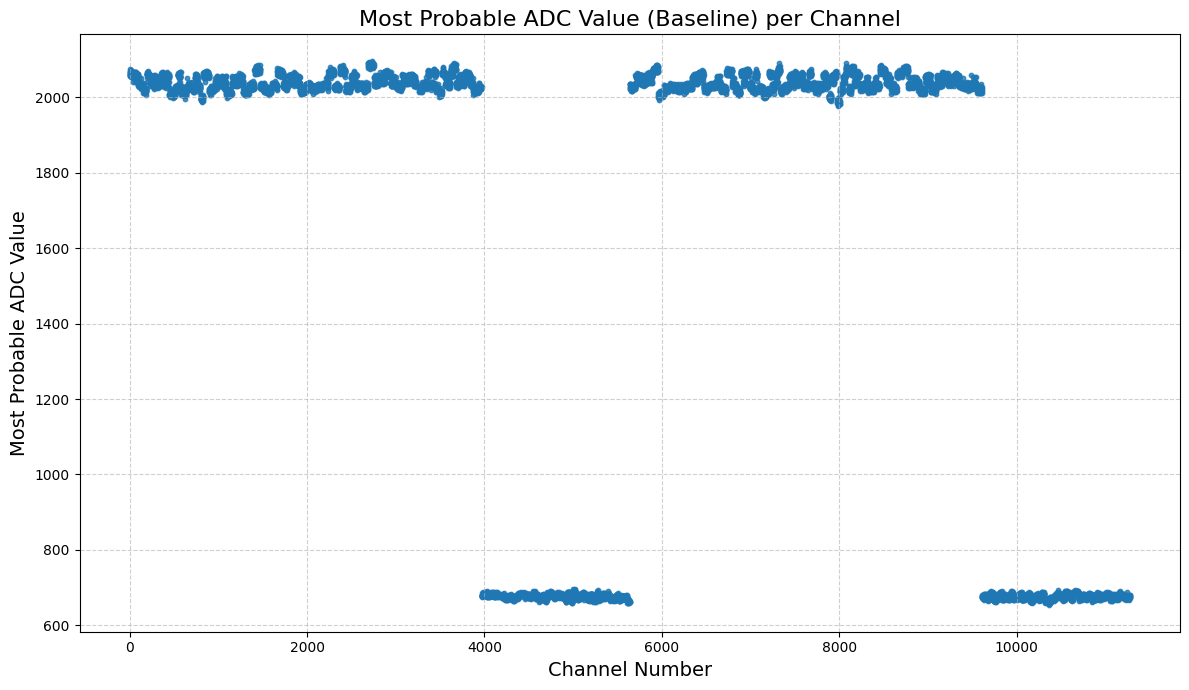

Saving results to channel_vs_most_probable_adc.csv...
Successfully saved data to CSV.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import csv
from collections import defaultdict

# --- User Configuration ---
# Set the path to the directory containing your .npz files
DATA_DIRECTORY = "/nevis/riverside/data/sc5303/sbnd/continuous_readout"
# Set the name for the output CSV file
OUTPUT_CSV_FILE = "channel_vs_most_probable_adc.csv"

def analyze_most_probable_adc(directory_path, output_file):
    """
    Loads data from all .npz files, finds the most probable ADC value for
    each channel, plots the result, and saves it to a CSV file.

    Args:
        directory_path (str): Path to the directory with .npz files.
        output_file (str): Filename for the output CSV.
    """
    # --- File Discovery ---
    search_pattern = os.path.join(directory_path, '*.npz')
    file_list = glob.glob(search_pattern)

    if not file_list:
        print(f"Error: No .npz files found in '{directory_path}'.")
        return

    print(f"Found {len(file_list)} files to process...")

    # --- Data Aggregation ---
    all_channels, all_adcs, all_counts = [], [], []
    for i, file_path in enumerate(file_list):
        try:
            print(f"  ({i+1}/{len(file_list)}) Loading: {os.path.basename(file_path)}")
            with np.load(file_path) as data:
                all_channels.append(data["channel"])
                all_adcs.append(data["adc"])
                all_counts.append(data["count"])
        except Exception as e:
            print(f"    Warning: Could not load {file_path}. Error: {e}")

    if not all_channels:
        print("Error: No data was loaded. Aborting.")
        return

    print("Combining data from all files...")
    combined_channels = np.concatenate(all_channels)
    combined_adcs = np.concatenate(all_adcs)
    combined_counts = np.concatenate(all_counts)
    print("Data combination complete.")

    # --- Find Most Probable ADC for each Channel ---
    print("Calculating most probable ADC for each channel...")
    # Use a nested dictionary to sum counts for each (channel, adc) pair
    # tally = {channel: {adc: total_count, ...}, ...}
    tally = defaultdict(lambda: defaultdict(int))
    for ch, adc, count in zip(combined_channels, combined_adcs, combined_counts):
        tally[ch][adc] += count

    result_channels = []
    most_probable_adcs = []
    
    # Sort channels to process them in order
    sorted_unique_channels = sorted(tally.keys())

    for channel in sorted_unique_channels:
        adc_counts = tally[channel]
        if not adc_counts:
            continue
        # Find the ADC value with the maximum count for the current channel
        # The key argument to max() specifies a function to be called on each item
        # before making comparisons. Here, it gets the count for each ADC.
        most_probable_adc = max(adc_counts, key=adc_counts.get)
        
        result_channels.append(channel)
        most_probable_adcs.append(most_probable_adc)
    
    print("Calculation complete.")

    # --- Plotting Results ---
    print("Generating plot...")
    plt.figure(figsize=(12, 7))
    # A scatter plot is appropriate for showing the value for each channel
    plt.scatter(result_channels, most_probable_adcs, s=10, alpha=0.8)

    plt.xlabel("Channel Number", fontsize=14)
    plt.ylabel("Most Probable ADC Value", fontsize=14)
    plt.title("Most Probable ADC Value (Baseline) per Channel", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- Save to CSV ---
    print(f"Saving results to {output_file}...")
    try:
        with open(output_file, 'w', newline='') as f:
            writer = csv.writer(f)
            # Write the header row
            writer.writerow(['channel', 'most_probable_adc'])
            # Write the data rows
            writer.writerows(zip(result_channels, most_probable_adcs))
        print("Successfully saved data to CSV.")
    except IOError as e:
        print(f"Error: Could not write to file {output_file}. Error: {e}")

# --- Main execution ---
if __name__ == "__main__":
    analyze_most_probable_adc(DATA_DIRECTORY, OUTPUT_CSV_FILE)


Found 21 files to process...
  (1/21) Loading: channel_adc_count_data_EventBuilder1_art2_run18487_15_strmOffBeamZeroBias_20250519T135242_TPCdecode_ADCDump.npz
  (2/21) Loading: channel_adc_count_data_EventBuilder2_p2_art1_run18487_12_strmOffBeamZeroBias_20250519T132558_TPCdecode_ADCDump.npz
  (3/21) Loading: channel_adc_count_data_EventBuilder3_p2_art2_run18487_6_strmOffBeamZeroBias_20250519T124257_TPCdecode_ADCDump.npz
  (4/21) Loading: channel_adc_count_data_EventBuilder5_art2_run18487_13_strmOffBeamZeroBias_20250519T133220_TPCdecode_ADCDump.npz


  (5/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (6/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_3_strmOffBeamZeroBias_20250519T122111_TPCdecode_ADCDump.npz
  (7/21) Loading: channel_adc_count_data_EventBuilder6_art2_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (8/21) Loading: channel_adc_count_data_EventBuilder6_art2_run18487_3_strmOffBeamZeroBias_20250519T122114_TPCdecode_ADCDump.npz
  (9/21) Loading: channel_adc_count_data_EventBuilder6_p2_art1_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (10/21) Loading: channel_adc_count_data_EventBuilder6_p2_art2_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (11/21) Loading: channel_adc_count_data_EventBuilder6_p2_art2_run18487_3_strmOffBeamZeroBias_20250519T122105_TPCdecode_ADCDump.npz
  (12/21) Loading: channel_adc_count_data_EventBuilder7_art1_run18487_1_strmOffBeamZer

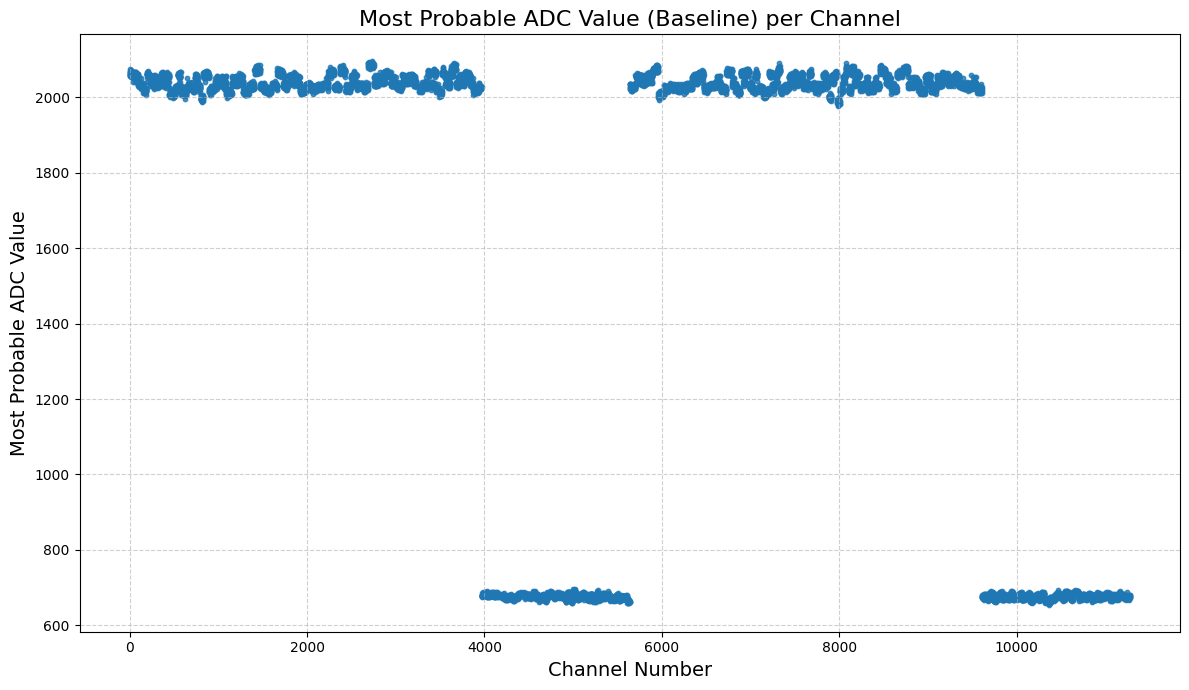

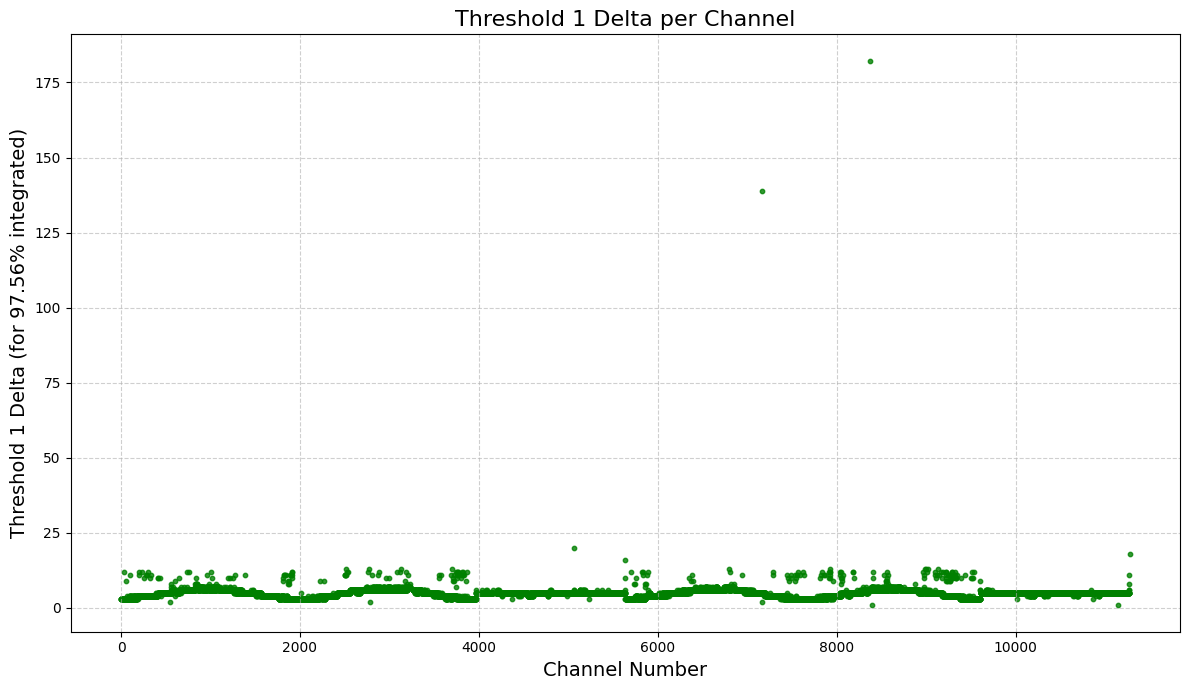

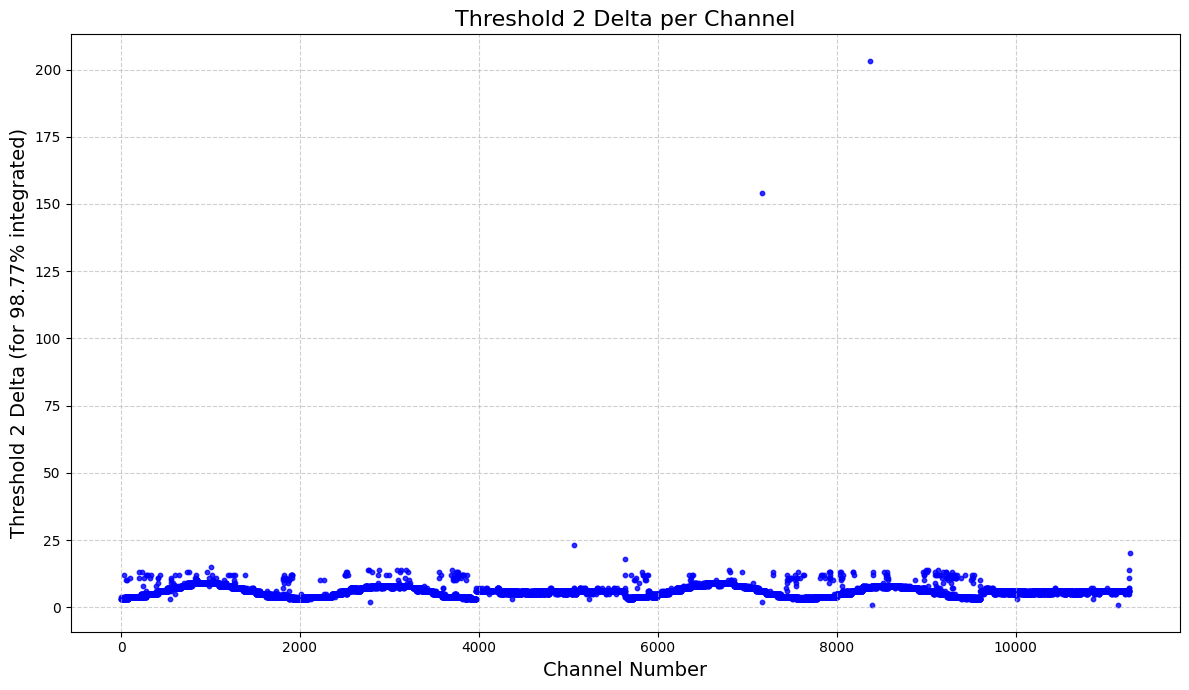

Saving results to channel_analysis_results.csv...
Successfully saved data to CSV.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import csv
from collections import defaultdict

# --- User Configuration ---
# Set the path to the directory containing your .npz files
DATA_DIRECTORY = "/nevis/riverside/data/sc5303/sbnd/continuous_readout"
# Set the name for the output CSV file
OUTPUT_CSV_FILE = "channel_analysis_results.csv" # Changed filename to be more general

# Define the target percentages for the integrated regions
THRESHOLD_PERCENTAGE_1 = 97.5609756098
THRESHOLD_PERCENTAGE_2 = 98.7654320988

def analyze_adc_data(directory_path, output_file):
    """
    Loads data from all .npz files, finds the most probable ADC value for
    each channel, finds thresholds based on integrated regions, plots the results,
    and saves them to a CSV file.

    Args:
        directory_path (str): Path to the directory with .npz files.
        output_file (str): Filename for the output CSV.
    """
    # --- File Discovery ---
    # Construct the search pattern for .npz files within the specified directory.
    search_pattern = os.path.join(directory_path, '*.npz')
    # Use glob to find all files matching the pattern.
    file_list = glob.glob(search_pattern)

    if not file_list:
        print(f"Error: No .npz files found in '{directory_path}'.")
        return

    print(f"Found {len(file_list)} files to process...")

    # --- Data Aggregation ---
    # Initialize empty lists to store combined data from all .npz files.
    all_channels, all_adcs, all_counts = [], [], []
    for i, file_path in enumerate(file_list):
        try:
            print(f"  ({i+1}/{len(file_list)}) Loading: {os.path.basename(file_path)}")
            # Load data from the current .npz file.
            with np.load(file_path) as data:
                all_channels.append(data["channel"])
                all_adcs.append(data["adc"])
                all_counts.append(data["count"])
        except Exception as e:
            # Print a warning if a file cannot be loaded.
            print(f"    Warning: Could not load {file_path}. Error: {e}")

    if not all_channels:
        print("Error: No data was loaded. Aborting.")
        return

    print("Combining data from all files...")
    # Concatenate data from all files into single NumPy arrays.
    combined_channels = np.concatenate(all_channels)
    combined_adcs = np.concatenate(all_adcs)
    combined_counts = np.concatenate(all_counts)
    print("Data combination complete.")

    # --- Aggregate counts for each (channel, adc) pair ---
    print("Aggregating ADC counts per channel...")
    # Use a nested defaultdict to sum counts for each unique (channel, adc) pair.
    # The structure will be: tally = {channel_number: {adc_value: total_count, ...}, ...}
    tally = defaultdict(lambda: defaultdict(int))
    for ch, adc, count in zip(combined_channels, combined_adcs, combined_counts):
        tally[ch][adc] += count
    print("Aggregation complete.")

    # --- Calculate Most Probable ADC and Thresholds for each Channel ---
    print("Calculating most probable ADC and thresholds for each channel...")
    # Lists to store the results for plotting and CSV saving.
    result_channels = []
    most_probable_adcs = []
    threshold_1_adcs = [] # List for threshold 1 values
    threshold_2_adcs = [] # List for threshold 2 values

    # Get a sorted list of all unique channel numbers to ensure consistent ordering.
    sorted_unique_channels = sorted(tally.keys())

    for channel in sorted_unique_channels:
        adc_counts = tally[channel]
        if not adc_counts:
            # Skip channels with no data.
            continue

        # Convert the dictionary of ADC counts for the current channel into
        # separate NumPy arrays for ADC values and their corresponding counts.
        adcs_for_channel = np.array(list(adc_counts.keys()))
        counts_for_channel = np.array(list(adc_counts.values()))

        # Find the most probable ADC value: this is the ADC value that has the maximum count.
        most_probable_adc = adcs_for_channel[np.argmax(counts_for_channel)]

        # --- Threshold Calculation ---
        total_counts_channel = np.sum(counts_for_channel)
        
        # Initialize variables for threshold search
        current_integrated_counts = adc_counts.get(most_probable_adc, 0) # Start with the baseline count
        found_threshold_1 = False
        found_threshold_2 = False
        threshold_1_value = np.nan # Initialize to NaN
        threshold_2_value = np.nan # Initialize to NaN

        # Iterate outwards from the most probable ADC to find the thresholds
        # The loop will expand the region symmetrically around the baseline.
        # Determine the maximum possible delta to search for, ensuring it covers all available ADC range.
        if adcs_for_channel.size > 0:
            max_delta = max(max(adcs_for_channel) - most_probable_adc, most_probable_adc - min(adcs_for_channel)) + 1
        else:
            max_delta = 1 # If no ADCs for channel, set a default small delta to avoid error

        for delta in range(1, max_delta): # delta represents the distance from the baseline
            # Add counts from ADC values above the baseline
            current_integrated_counts += adc_counts.get(most_probable_adc + delta, 0)
            # Add counts from ADC values below the baseline
            current_integrated_counts += adc_counts.get(most_probable_adc - delta, 0)
            
            # Calculate the current percentage of total counts integrated
            if total_counts_channel > 0:
                current_percentage = (current_integrated_counts / total_counts_channel) * 100
            else:
                current_percentage = 0 # Avoid division by zero

            # Check if threshold 1 has been met
            if not found_threshold_1 and current_percentage >= THRESHOLD_PERCENTAGE_1:
                threshold_1_value = delta
                found_threshold_1 = True
            
            # Check if threshold 2 has been met
            if not found_threshold_2 and current_percentage >= THRESHOLD_PERCENTAGE_2:
                threshold_2_value = delta
                found_threshold_2 = True
                break # Both thresholds found, no need to continue expanding

        # Append the calculated values. If a threshold wasn't found (e.g., due to insufficient data spread),
        # append NaN.
        result_channels.append(channel)
        most_probable_adcs.append(most_probable_adc)
        threshold_1_adcs.append(threshold_1_value)
        threshold_2_adcs.append(threshold_2_value)
    
    print("Calculation complete.")

    # --- Plotting Results ---
    print("Generating plots...")

    # Plot 1: Most Probable ADC Value per Channel
    plt.figure(figsize=(12, 7))
    plt.scatter(result_channels, most_probable_adcs, s=10, alpha=0.8)
    plt.xlabel("Channel Number", fontsize=14)
    plt.ylabel("Most Probable ADC Value", fontsize=14)
    plt.title("Most Probable ADC Value (Baseline) per Channel", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Plot 2: Threshold 1 Delta per Channel
    plt.figure(figsize=(12, 7))
    plt.scatter(result_channels, threshold_1_adcs, s=10, alpha=0.8, color='green')
    plt.xlabel("Channel Number", fontsize=14)
    plt.ylabel(f"Threshold 1 Delta (for {THRESHOLD_PERCENTAGE_1:.2f}% integrated)", fontsize=14)
    plt.title("Threshold 1 Delta per Channel", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Plot 3: Threshold 2 Delta per Channel
    plt.figure(figsize=(12, 7))
    plt.scatter(result_channels, threshold_2_adcs, s=10, alpha=0.8, color='blue')
    plt.xlabel("Channel Number", fontsize=14)
    plt.ylabel(f"Threshold 2 Delta (for {THRESHOLD_PERCENTAGE_2:.2f}% integrated)", fontsize=14)
    plt.title("Threshold 2 Delta per Channel", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


    # --- Save to CSV ---
    print(f"Saving results to {output_file}...")
    try:
        with open(output_file, 'w', newline='') as f:
            writer = csv.writer(f)
            # Write the header row, including the new threshold columns.
            writer.writerow(['channel', 'most_probable_adc', 'threshold_1_delta', 'threshold_2_delta'])
            # Write the data rows, zipping all result lists together.
            writer.writerows(zip(result_channels, most_probable_adcs, threshold_1_adcs, threshold_2_adcs))
        print("Successfully saved data to CSV.")
    except IOError as e:
        print(f"Error: Could not write to file {output_file}. Error: {e}")

# --- Main execution ---
if __name__ == "__main__":
    analyze_adc_data(DATA_DIRECTORY, OUTPUT_CSV_FILE)



Found 21 files to process...
  (1/21) Loading: channel_adc_count_data_EventBuilder1_art2_run18487_15_strmOffBeamZeroBias_20250519T135242_TPCdecode_ADCDump.npz
  (2/21) Loading: channel_adc_count_data_EventBuilder2_p2_art1_run18487_12_strmOffBeamZeroBias_20250519T132558_TPCdecode_ADCDump.npz
  (3/21) Loading: channel_adc_count_data_EventBuilder3_p2_art2_run18487_6_strmOffBeamZeroBias_20250519T124257_TPCdecode_ADCDump.npz
  (4/21) Loading: channel_adc_count_data_EventBuilder5_art2_run18487_13_strmOffBeamZeroBias_20250519T133220_TPCdecode_ADCDump.npz
  (5/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (6/21) Loading: channel_adc_count_data_EventBuilder6_art1_run18487_3_strmOffBeamZeroBias_20250519T122111_TPCdecode_ADCDump.npz
  (7/21) Loading: channel_adc_count_data_EventBuilder6_art2_run18487_1_strmOffBeamZeroBias_20250519T120614_TPCdecode_ADCDump.npz
  (8/21) Loading: channel_adc_count_data_EventBuilder6_art2

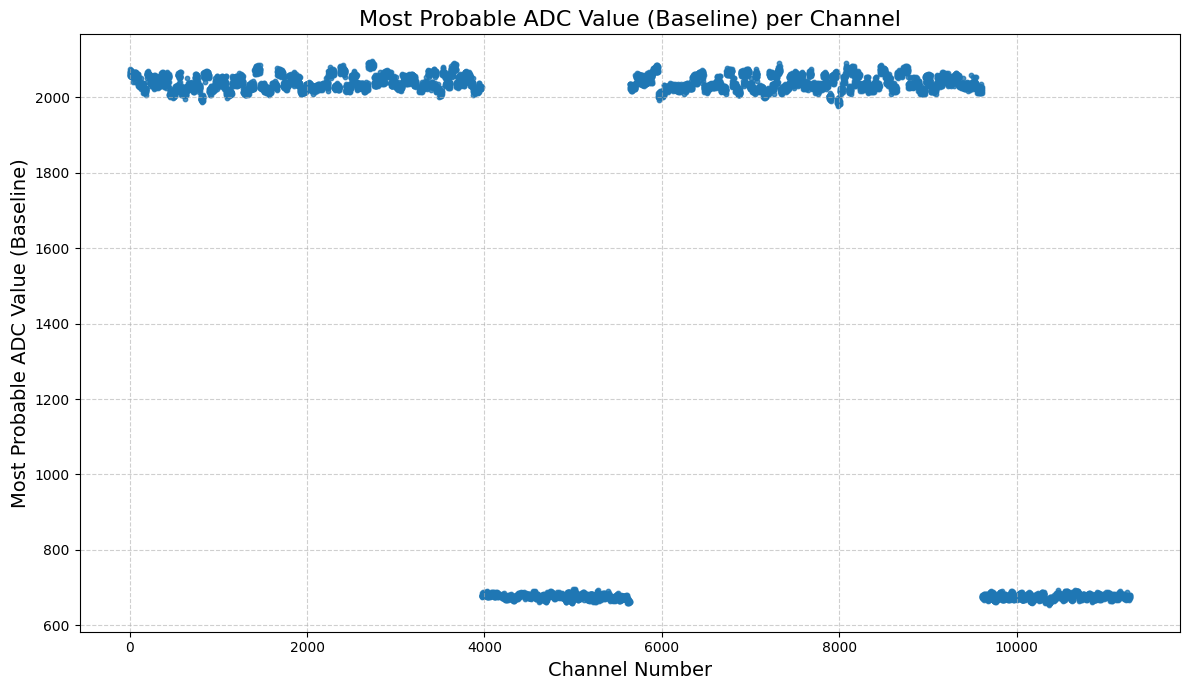

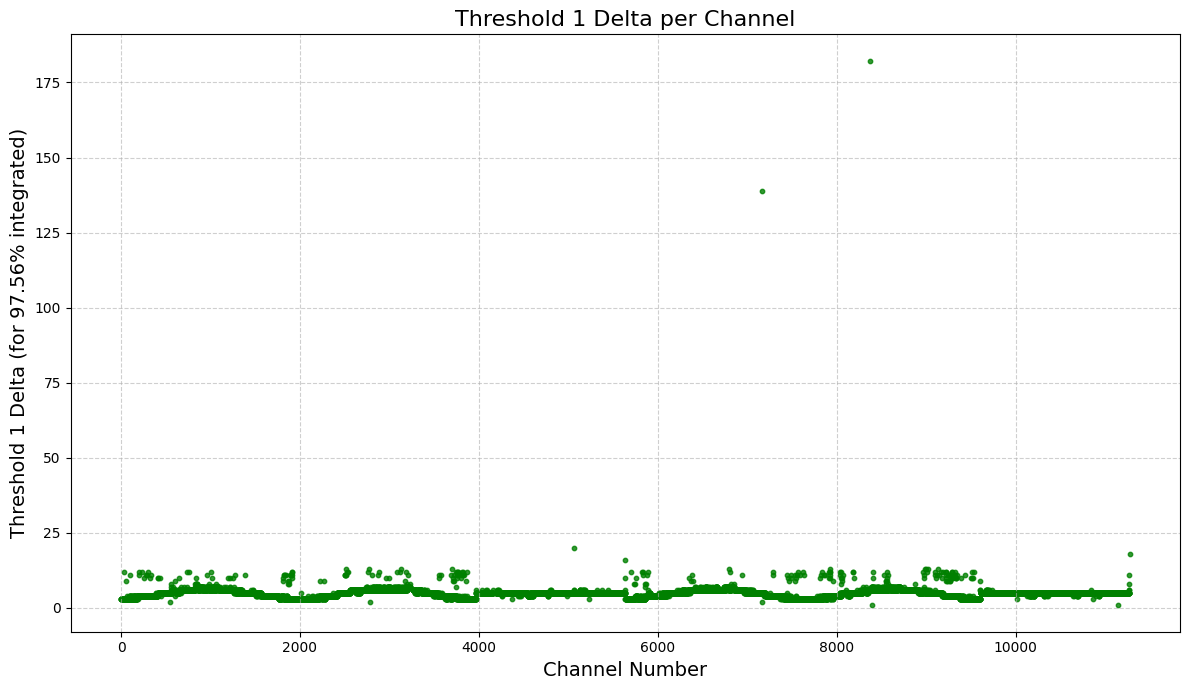

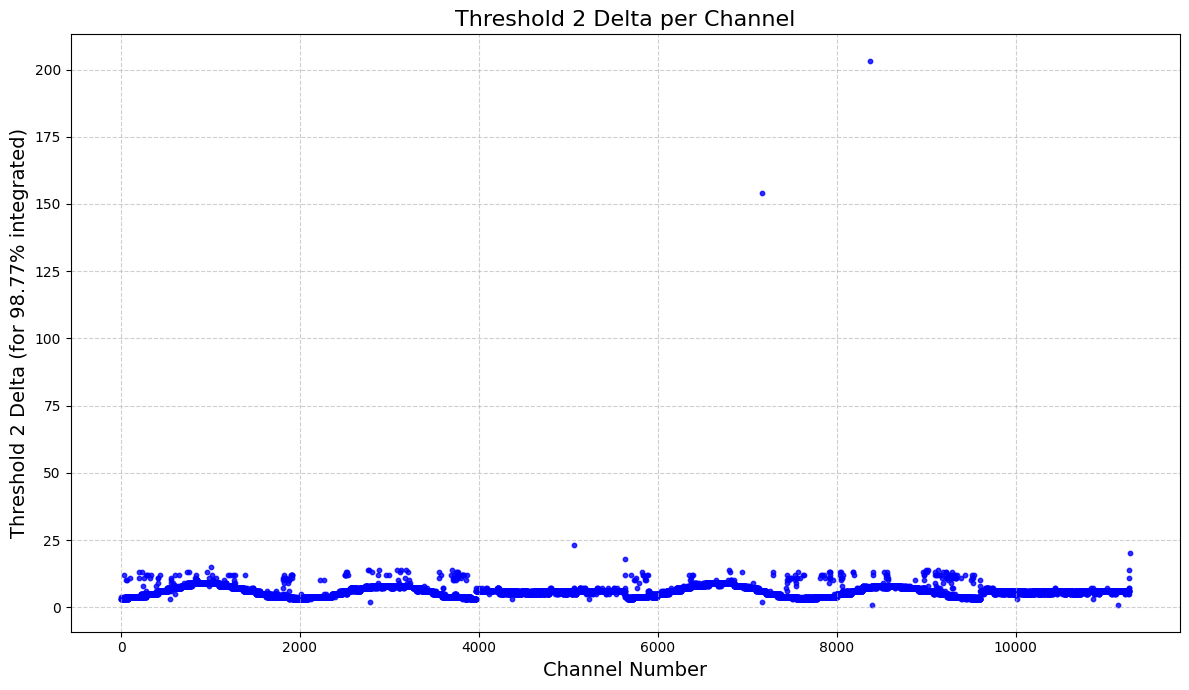

Saving results to channel_config.fcl...
Successfully saved FHiCL configuration to channel_config.fcl


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from collections import defaultdict

# --- User Configuration ---
# Set the path to the directory containing your .npz files
DATA_DIRECTORY = "/nevis/riverside/data/sc5303/sbnd/continuous_readout"
# Set the name for the output FHiCL file
OUTPUT_FCL_FILE = "channel_config.fcl"

# Define the target percentages for the integrated regions
THRESHOLD_PERCENTAGE_1 = 97.5609756098
THRESHOLD_PERCENTAGE_2 = 98.7654320988

def analyze_adc_data(directory_path, output_file):
    """
    Loads data from all .npz files, finds the most probable ADC value for
    each channel, finds thresholds based on integrated regions, plots the results,
    and saves them to a FHiCL file.

    Args:
        directory_path (str): Path to the directory with .npz files.
        output_file (str): Filename for the output FCL.
    """
    # --- File Discovery ---
    search_pattern = os.path.join(directory_path, '*.npz')
    file_list = glob.glob(search_pattern)

    if not file_list:
        print(f"Error: No .npz files found in '{directory_path}'.")
        return

    print(f"Found {len(file_list)} files to process...")

    # --- Data Aggregation ---
    all_channels, all_adcs, all_counts = [], [], []
    for i, file_path in enumerate(file_list):
        try:
            print(f"  ({i+1}/{len(file_list)}) Loading: {os.path.basename(file_path)}")
            with np.load(file_path) as data:
                all_channels.append(data["channel"])
                all_adcs.append(data["adc"])
                all_counts.append(data["count"])
        except Exception as e:
            print(f"    Warning: Could not load {file_path}. Error: {e}")

    if not all_channels:
        print("Error: No data was loaded. Aborting.")
        return

    print("Combining data from all files...")
    combined_channels = np.concatenate(all_channels)
    combined_adcs = np.concatenate(all_adcs)
    combined_counts = np.concatenate(all_counts)
    print("Data combination complete.")

    # --- Aggregate counts for each (channel, adc) pair ---
    print("Aggregating ADC counts per channel...")
    tally = defaultdict(lambda: defaultdict(int))
    for ch, adc, count in zip(combined_channels, combined_adcs, combined_counts):
        tally[ch][adc] += count
    print("Aggregation complete.")

    # --- Calculate Most Probable ADC and Thresholds for each Channel ---
    print("Calculating most probable ADC and thresholds for each channel...")
    result_channels = []
    most_probable_adcs = []
    threshold_1_adcs = [] 
    threshold_2_adcs = []

    sorted_unique_channels = sorted(tally.keys())

    for channel in sorted_unique_channels:
        adc_counts = tally[channel]
        if not adc_counts:
            continue

        adcs_for_channel = np.array(list(adc_counts.keys()))
        counts_for_channel = np.array(list(adc_counts.values()))
        most_probable_adc = adcs_for_channel[np.argmax(counts_for_channel)]
        total_counts_channel = np.sum(counts_for_channel)
        
        current_integrated_counts = adc_counts.get(most_probable_adc, 0)
        found_threshold_1 = False
        found_threshold_2 = False
        threshold_1_value = np.nan
        threshold_2_value = np.nan

        if adcs_for_channel.size > 0:
            max_delta = max(max(adcs_for_channel) - most_probable_adc, most_probable_adc - min(adcs_for_channel)) + 1
        else:
            max_delta = 1

        for delta in range(1, max_delta):
            current_integrated_counts += adc_counts.get(most_probable_adc + delta, 0)
            current_integrated_counts += adc_counts.get(most_probable_adc - delta, 0)
            
            if total_counts_channel > 0:
                current_percentage = (current_integrated_counts / total_counts_channel) * 100
            else:
                current_percentage = 0

            if not found_threshold_1 and current_percentage >= THRESHOLD_PERCENTAGE_1:
                threshold_1_value = delta
                found_threshold_1 = True
            
            if not found_threshold_2 and current_percentage >= THRESHOLD_PERCENTAGE_2:
                threshold_2_value = delta
                found_threshold_2 = True
                break

        result_channels.append(channel)
        most_probable_adcs.append(most_probable_adc)
        threshold_1_adcs.append(threshold_1_value)
        threshold_2_adcs.append(threshold_2_value)
    
    print("Calculation complete.")

    # --- Plotting Results (remains the same) ---
    print("Generating plots...")
    # Plot 1: Most Probable ADC Value per Channel
    plt.figure(figsize=(12, 7))
    plt.scatter(result_channels, most_probable_adcs, s=10, alpha=0.8)
    plt.xlabel("Channel Number", fontsize=14)
    plt.ylabel("Most Probable ADC Value (Baseline)", fontsize=14)
    plt.title("Most Probable ADC Value (Baseline) per Channel", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    # Plot 2: Threshold 1 Delta per Channel
    plt.figure(figsize=(12, 7))
    plt.scatter(result_channels, threshold_1_adcs, s=10, alpha=0.8, color='green')
    plt.xlabel("Channel Number", fontsize=14)
    plt.ylabel(f"Threshold 1 Delta (for {THRESHOLD_PERCENTAGE_1:.2f}% integrated)", fontsize=14)
    plt.title("Threshold 1 Delta per Channel", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    # Plot 3: Threshold 2 Delta per Channel
    plt.figure(figsize=(12, 7))
    plt.scatter(result_channels, threshold_2_adcs, s=10, alpha=0.8, color='blue')
    plt.xlabel("Channel Number", fontsize=14)
    plt.ylabel(f"Threshold 2 Delta (for {THRESHOLD_PERCENTAGE_2:.2f}% integrated)", fontsize=14)
    plt.title("Threshold 2 Delta per Channel", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # --- BEGIN MODIFICATION: Save to FCL file ---
    print(f"Saving results to {output_file}...")
    try:
        fcl_lines = []
        # Prepare the FCL lines for each channel with valid data
        for chan, baseline, t1_delta, t2_delta in zip(result_channels, most_probable_adcs, threshold_1_adcs, threshold_2_adcs):
            # The C++ code expects unsigned integers, so skip any channels where
            # the calculation resulted in NaN (Not a Number).
            if np.isnan(baseline) or np.isnan(t1_delta) or np.isnan(t2_delta):
                print(f"  Warning: Skipping channel {int(chan)} due to NaN values in calculation.")
                continue
            
            # Format the line for the FCL file. Values are cast to int.
            # The 'baseline' corresponds to the most probable ADC.
            # The 'threshold1' and 'threshold2' correspond to the calculated deltas.
            fcl_line = f"  {{ channel: {int(chan)}, baseline: {int(baseline)}, threshold1: {int(t1_delta)}, threshold2: {int(t2_delta)} }}"
            fcl_lines.append(fcl_line)

        # Write the complete FCL file
        with open(output_file, 'w') as f:
            f.write("# FHiCL configuration generated by analyze_adc_data.py\n")
            f.write("# This file contains static baseline and threshold configurations for each channel.\n\n")
            
            f.write("# This flag should be set to true in the main FCL file to use this static configuration.\n")
            f.write("zs_static_baseline: true\n\n")
            
            f.write("# This flag selects which threshold to use from the list below.\n")
            f.write("# false = use 'threshold1', true = use 'threshold2'\n")
            f.write("use_threshold_2: false\n\n")

            f.write("# Sequence of tables containing the per-channel configurations.\n")
            f.write("channel_configurations: [\n")
            
            # Join the individual channel lines with commas and write to file
            f.write(",\n".join(fcl_lines))
            
            f.write("\n]\n") # Close the sequence

        print(f"Successfully saved FHiCL configuration to {output_file}")
    except IOError as e:
        print(f"Error: Could not write to file {output_file}. Error: {e}")
    # --- END MODIFICATION ---

# --- Main execution ---
if __name__ == "__main__":
    analyze_adc_data(DATA_DIRECTORY, OUTPUT_FCL_FILE)